In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Read the dataset and understand the features and target variable.

In [2]:
colnam=['IR','MR','FF','CRED','COMP','OR','CLASS']

The column names denoted as:

1. Industrial Risk: IR
2. Management Risk: MR
3. Financial Flexibility: FF
4. Credibility: CRED
5. Competitiveness: COMP
6. Operating Risk: OR
7. Class: CLASS

In [3]:
bankrup=pd.read_csv(r"C:\Users\Admin\Desktop\Python\Unsupervised Project Jan 2020\Qualitative_Bankruptcy.data.txt",names=colnam)

In [4]:
bankrup.shape

(250, 7)

In [5]:
bankrup.head(5)

,IR,MR,FF,CRED,COMP,OR,CLASS
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [6]:
bankrup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
IR       250 non-null object
MR       250 non-null object
FF       250 non-null object
CRED     250 non-null object
COMP     250 non-null object
OR       250 non-null object
CLASS    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [7]:
bankrup["IR"].value_counts()

N    89
A    81
P    80
Name: IR, dtype: int64

In [8]:
bankrup["MR"].value_counts()

N    119
A     69
P     62
Name: MR, dtype: int64

In [9]:
bankrup["FF"].value_counts()

N    119
A     74
P     57
Name: FF, dtype: int64

In [10]:
bankrup["CRED"].value_counts()

N    94
P    79
A    77
Name: CRED, dtype: int64

In [11]:
bankrup["COMP"].value_counts()

N    103
P     91
A     56
Name: COMP, dtype: int64

In [12]:
bankrup["OR"].value_counts()

N    114
P     79
A     57
Name: OR, dtype: int64

In [13]:
bankrup["CLASS"].value_counts()

NB    143
B     107
Name: CLASS, dtype: int64

In [14]:
bankrup.isnull().sum()

IR       0
MR       0
FF       0
CRED     0
COMP     0
OR       0
CLASS    0
dtype: int64

In [15]:
bankrup_dummy=pd.get_dummies(data=bankrup,columns=["IR","MR","FF","CRED","COMP","OR"])

In [16]:
bankrup_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 19 columns):
CLASS     250 non-null object
IR_A      250 non-null uint8
IR_N      250 non-null uint8
IR_P      250 non-null uint8
MR_A      250 non-null uint8
MR_N      250 non-null uint8
MR_P      250 non-null uint8
FF_A      250 non-null uint8
FF_N      250 non-null uint8
FF_P      250 non-null uint8
CRED_A    250 non-null uint8
CRED_N    250 non-null uint8
CRED_P    250 non-null uint8
COMP_A    250 non-null uint8
COMP_N    250 non-null uint8
COMP_P    250 non-null uint8
OR_A      250 non-null uint8
OR_N      250 non-null uint8
OR_P      250 non-null uint8
dtypes: object(1), uint8(18)
memory usage: 6.4+ KB


In [17]:
bankrup_dummy.shape

(250, 19)

In [18]:
bankrup_dummy.head()

,CLASS,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,CRED_A,CRED_N,CRED_P,COMP_A,COMP_N,COMP_P,OR_A,OR_N,OR_P
0,NB,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,NB,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,NB,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,NB,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,NB,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [19]:
bankrup_dummy["CLASS"].value_counts()

NB    143
B     107
Name: CLASS, dtype: int64

In [20]:
x=bankrup_dummy.drop(["CLASS"],axis=1)

In [21]:
x.shape

(250, 18)

In [22]:
x.head()

,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,CRED_A,CRED_N,CRED_P,COMP_A,COMP_N,COMP_P,OR_A,OR_N,OR_P
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [23]:
y=bankrup_dummy["CLASS"]

In [24]:
y.head()

0    NB
1    NB
2    NB
3    NB
4    NB
Name: CLASS, dtype: object

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

In [27]:
X_train.head()

,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,CRED_A,CRED_N,CRED_P,COMP_A,COMP_N,COMP_P,OR_A,OR_N,OR_P
152,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
175,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
191,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
122,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0


In [28]:
X_test.head()

,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,CRED_A,CRED_N,CRED_P,COMP_A,COMP_N,COMP_P,OR_A,OR_N,OR_P
53,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0
113,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0
165,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
169,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
248,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [29]:
cov_matrix = np.cov(X_train.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 0.21105528 -0.11155779 -0.09949749  0.04723618 -0.05879397  0.01155779
  -0.00150754  0.01055276 -0.00904523 -0.0040201  -0.01809045  0.02211055
   0.01256281 -0.01809045  0.00552764  0.04120603 -0.03316583 -0.0080402 ]
 [-0.11155779  0.23427136 -0.12271357 -0.06150754  0.09231156 -0.03080402
  -0.01291457  0.02306533 -0.01015075  0.00291457  0.0118593  -0.01477387
  -0.02839196  0.06361809 -0.03522613 -0.01015075  0.03497487 -0.02482412]
 [-0.09949749 -0.12271357  0.22221106  0.01427136 -0.03351759  0.01924623
   0.01442211 -0.03361809  0.01919598  0.00110553  0.00623116 -0.00733668
   0.01582915 -0.04552764  0.02969849 -0.03105528 -0.00180905  0.03286432]
 [ 0.04723618 -0.06150754  0.01427136  0.19336683 -0.12934673 -0.0640201
   0.01075377 -0.02603015  0.01527638  0.00422111 -0.00864322  0.00442211
  -0.01356784 -0.02673367  0.04030151  0.04040201 -0.02472362 -0.01567839]
 [-0.05879397  0.09231156 -0.03351759 -0.12934673  0.25123116 -0.12188442
  -0.0411809 

In [30]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.06178382 -0.43743773 -0.03594451  0.25633977 -0.1726113  -0.33733293
   0.12911866  0.24329578 -0.33558963 -0.23833851 -0.11876014 -0.03890143
   0.05777129 -0.02739146 -0.48833547 -0.14112277 -0.08646767  0.05319087]
 [ 0.16161012  0.48616191 -0.11778177  0.31957158  0.02950768 -0.03878461
   0.13089072 -0.32593541  0.36218438  0.08204333 -0.03856262  0.15185509
   0.05777129 -0.02739146 -0.48833547 -0.14112277 -0.08646767  0.05319087]
 [-0.0998263  -0.04872417  0.15372628 -0.57591135  0.14310362  0.37611754
  -0.26000938  0.08263963 -0.02659475  0.15629518  0.15732276 -0.11295366
   0.05777129 -0.02739146 -0.48833547 -0.14112277 -0.08646767  0.05319087]
 [-0.09778892 -0.39310307  0.23948476  0.11990042 -0.04664224  0.09165825
  -0.18656186 -0.35578683  0.37128253 -0.31766825  0.13422047  0.04582156
   0.01038762 -0.01375703 -0.29304269  0.27939074  0.46285412 -0.26750274]
 [ 0.27054214  0.35397266 -0.23702077  0.15689171  0.11601078  0.20015588
  -0.25643706  0

In [31]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 26.5477921   38.19715109  48.1557856   57.71348894  66.39581862
  74.30399886  81.33666171  86.9768004   91.85487703  96.10217063
  98.61506288 100.         100.         100.         100.
 100.         100.         100.        ]


In the above inference, we can see that after 10th Principle component, the cumulative variance is above 96%. Let us deduce the same observation through elbow plot.

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA().fit(X_train)

In [34]:
import matplotlib.pyplot as plt

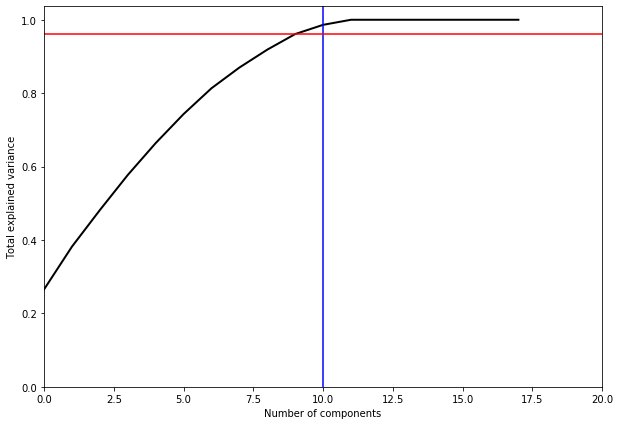

In [35]:
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 20)
plt.yticks(np.arange(0, 1.1, 0.2))

plt.axvline(10, c='b')
plt.axhline(0.96, c='r')

plt.show()

Throgh Elbow plot, we can say that the number of components which covers more than 95% of the variance is above 9. Hence we can take 10 Principle components.

In [36]:
pca_2= PCA(n_components=10)

In [37]:
pca_2.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
x_pca= pca_2.transform(X_train)

In [39]:
x_pca.shape

(200, 10)

In [40]:
x_pca

array([[ 1.06726703,  0.86257864,  0.23756245, ..., -0.01147803,
         0.03722406, -0.16076799],
       [-0.3929433 ,  1.13060475,  0.4582228 , ...,  0.31640838,
        -0.08064354, -0.23574119],
       [ 1.22562007, -0.21142501,  0.61527544, ..., -0.75136777,
        -0.85980275, -0.20790257],
       ...,
       [ 1.45695787, -0.00742846, -0.52674599, ..., -0.11154359,
        -0.21355976,  0.63345403],
       [ 1.45695787, -0.00742846, -0.52674599, ..., -0.11154359,
        -0.21355976,  0.63345403],
       [-0.65437972,  0.59571867,  0.72973086, ...,  0.72498341,
         0.30813558, -0.16148935]])

In [41]:
x_pca_df=pd.DataFrame(x_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [42]:
x_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.067267,0.862579,0.237562,0.332496,0.521837,0.146515,0.420537,-0.011478,0.037224,-0.160768
1,-0.392943,1.130605,0.458223,0.791883,-1.077430,-0.236303,-0.067373,0.316408,-0.080644,-0.235741
2,1.225620,-0.211425,0.615275,0.038061,0.004933,-0.365109,0.060487,-0.751368,-0.859803,-0.207903
3,0.611103,-0.428908,-0.584464,-0.381038,-0.016036,0.686903,-0.906362,0.839661,-0.158650,0.632169
4,-0.279260,1.205587,-0.464763,0.235977,0.118052,-0.894152,-0.972252,0.135113,-0.312206,-0.180816


In [43]:
import seaborn as sns

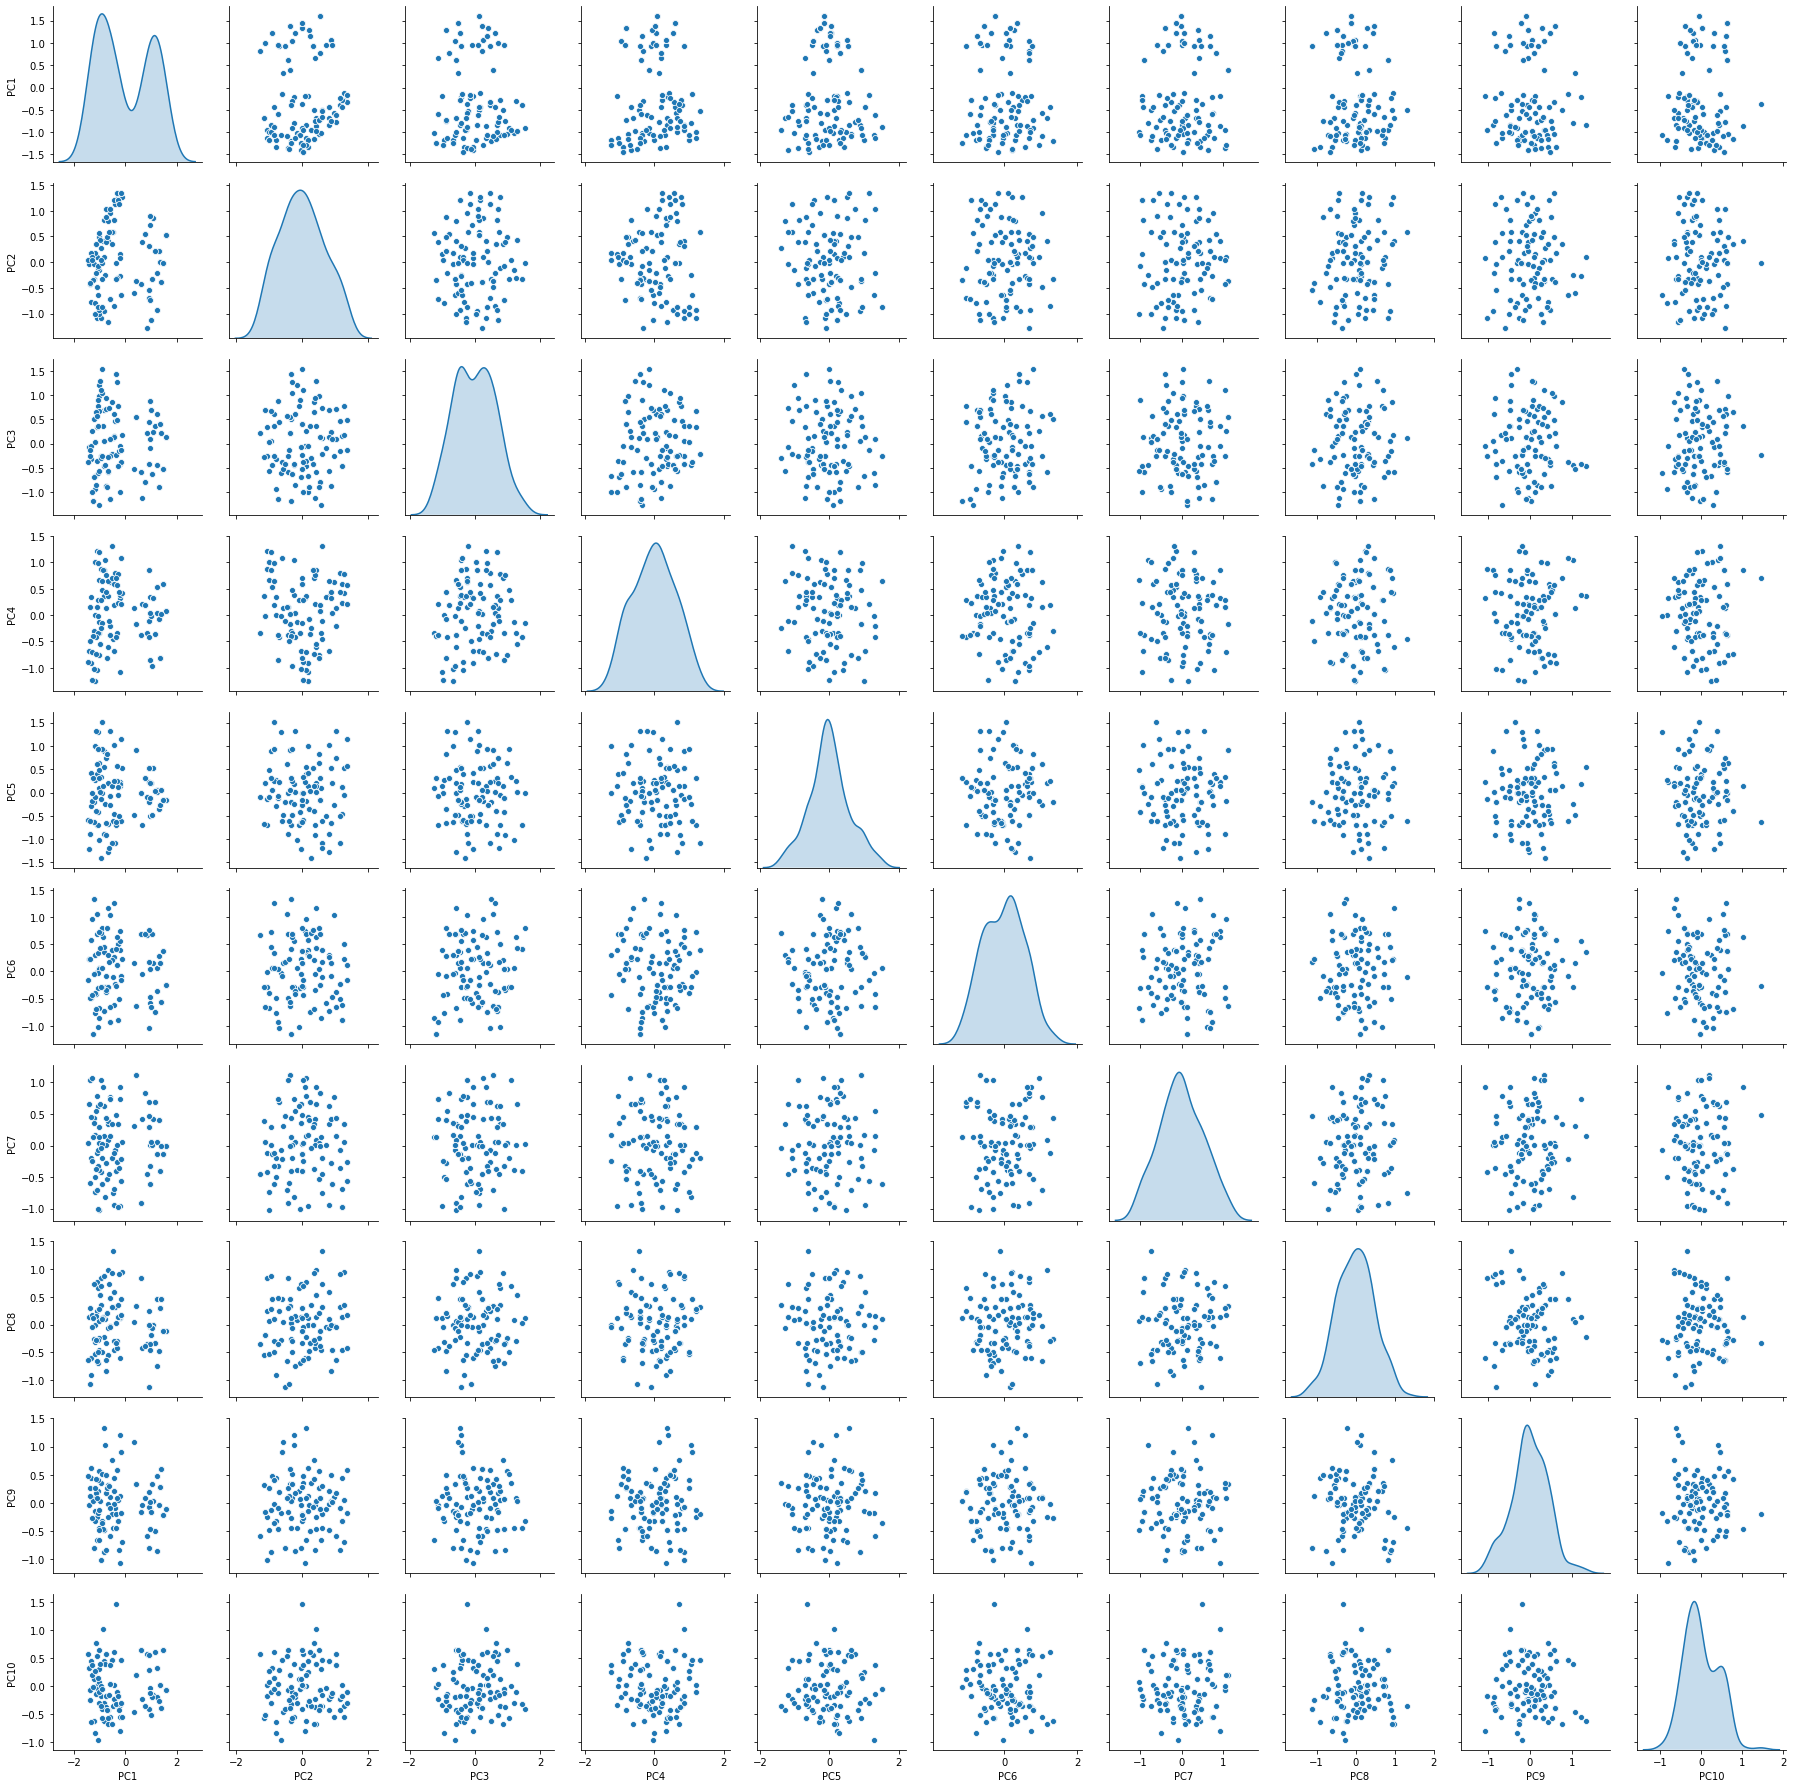

In [49]:
sns.pairplot(x_pca_df,diag_kind='kde')

From Pairplot, we can see the data has maximum of two peaks and minimum of one peak

In [45]:
from sklearn.cluster import KMeans


# Let us check optimal number of clusters-


cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(x_pca_df)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,746.185304
1,2,561.172427
2,3,506.722988
3,4,463.159462
4,5,428.330690
5,6,393.476807
6,7,370.910682
7,8,347.628491
8,9,328.764297


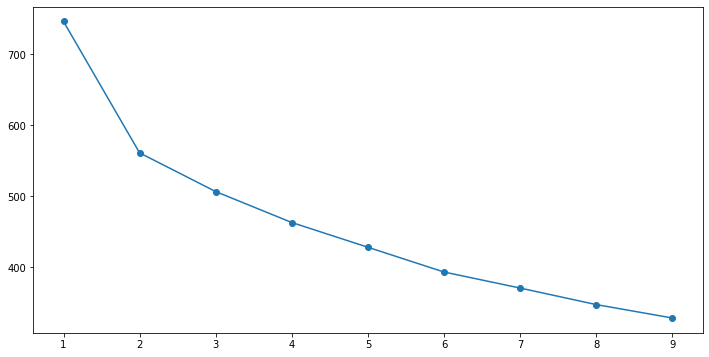

In [46]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

From ELBOW Method, we can see in the graph that maximum bend is at n_clusters = 2. Hence the optimum nember of clusters to be selected is 2

From Elbow Plot and Pairplot, we can infer the number of clusters to be taken must be 2.

In [50]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2)

In [51]:
kmeans.fit(x_pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [52]:
print(kmeans.cluster_centers_)

[[ 1.09734378 -0.10789402 -0.0197026  -0.07190479  0.0114375   0.0041682
   0.05080607 -0.03678135  0.00455759  0.02796563]
 [-0.82782074  0.08139373  0.01486336  0.05424397 -0.00862829 -0.00314443
  -0.03832738  0.02774734 -0.00343818 -0.02109688]]


In [53]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

In [54]:
df_labels.head()

,labels
0,0
1,1
2,0
3,0
4,1


In [55]:
df_labels['labels'].value_counts()

1    114
0     86
Name: labels, dtype: int64

Taking backup of the output of PCA

In [56]:
x_pca_df_2=x_pca_df

In [57]:
x_pca_df["Clus_Labels"]=df_labels['labels']

In [58]:
x_pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
PC1            200 non-null float64
PC2            200 non-null float64
PC3            200 non-null float64
PC4            200 non-null float64
PC5            200 non-null float64
PC6            200 non-null float64
PC7            200 non-null float64
PC8            200 non-null float64
PC9            200 non-null float64
PC10           200 non-null float64
Clus_Labels    200 non-null int32
dtypes: float64(10), int32(1)
memory usage: 16.5 KB


In [59]:
x_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Clus_Labels
0,1.067267,0.862579,0.237562,0.332496,0.521837,0.146515,0.420537,-0.011478,0.037224,-0.160768,0
1,-0.392943,1.130605,0.458223,0.791883,-1.077430,-0.236303,-0.067373,0.316408,-0.080644,-0.235741,1
2,1.225620,-0.211425,0.615275,0.038061,0.004933,-0.365109,0.060487,-0.751368,-0.859803,-0.207903,0
3,0.611103,-0.428908,-0.584464,-0.381038,-0.016036,0.686903,-0.906362,0.839661,-0.158650,0.632169,0
4,-0.279260,1.205587,-0.464763,0.235977,0.118052,-0.894152,-0.972252,0.135113,-0.312206,-0.180816,1


In [71]:
x_pca_df.shape

(200, 11)

In [60]:
pca_2.fit(X_test)
x_pca_test= pca_2.transform(X_test)

In [61]:
print(x_pca_test)

[[-8.65065039e-01  1.57596962e-01 -7.90368361e-01 -3.98165490e-01
  -1.05349288e+00 -1.83390714e-01  1.25154100e+00  5.66960251e-02
   1.68995519e-01 -2.85831488e-01]
 [-1.08549378e+00 -6.42520747e-01 -1.00994916e+00  3.41255886e-01
  -6.79795103e-01 -5.56416737e-01 -7.68565870e-01  1.37407596e-01
   1.52284320e-01 -9.34978592e-03]
 [ 1.39654803e+00  3.32326552e-01  2.11866291e-01  5.73364832e-01
   7.15176484e-02 -4.16038861e-02  4.30296714e-01 -3.36330204e-01
  -6.24046583e-01  1.15057083e-01]
 [ 1.01390962e+00 -1.15157802e+00  3.05008099e-01  1.17862403e-01
  -4.05704417e-01  2.82462710e-01 -2.93531203e-01 -4.05797259e-01
   1.04603402e-01 -8.39266064e-02]
 [ 1.63785588e+00  4.33057926e-01 -8.53798158e-02 -2.62321391e-01
   1.37964603e-01  2.33741449e-01  5.89925214e-02  1.37909874e-01
   1.77136790e-01 -6.27047596e-03]
 [-3.87347416e-01  2.31858751e-01 -1.02054461e+00 -3.85559385e-01
   9.63109084e-01 -9.84065104e-01 -3.70616806e-01 -6.56200833e-02
   6.39707326e-01 -3.42909368e-01

In [62]:
x_pca_test_df=pd.DataFrame(x_pca_test, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [63]:
x_pca_test_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.865065,0.157597,-0.790368,-0.398165,-1.053493,-0.183391,1.251541,0.056696,0.168996,-0.285831
1,-1.085494,-0.642521,-1.009949,0.341256,-0.679795,-0.556417,-0.768566,0.137408,0.152284,-0.009350
2,1.396548,0.332327,0.211866,0.573365,0.071518,-0.041604,0.430297,-0.336330,-0.624047,0.115057
3,1.013910,-1.151578,0.305008,0.117862,-0.405704,0.282463,-0.293531,-0.405797,0.104603,-0.083927
4,1.637856,0.433058,-0.085380,-0.262321,0.137965,0.233741,0.058993,0.137910,0.177137,-0.006270


In [64]:
kmeans.fit(x_pca_test_df)
df_labels_test = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

In [65]:
df_labels_test.head()

,labels
0,0
1,0
2,1
3,1
4,1


In [66]:
x_pca_test_df["Clus_Labels"]=df_labels_test['labels']

In [69]:
x_pca_test_df.shape

(50, 11)

In [67]:
x_pca_test_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Clus_Labels
0,-0.865065,0.157597,-0.790368,-0.398165,-1.053493,-0.183391,1.251541,0.056696,0.168996,-0.285831,0
1,-1.085494,-0.642521,-1.009949,0.341256,-0.679795,-0.556417,-0.768566,0.137408,0.152284,-0.009350,0
2,1.396548,0.332327,0.211866,0.573365,0.071518,-0.041604,0.430297,-0.336330,-0.624047,0.115057,1
3,1.013910,-1.151578,0.305008,0.117862,-0.405704,0.282463,-0.293531,-0.405797,0.104603,-0.083927,1
4,1.637856,0.433058,-0.085380,-0.262321,0.137965,0.233741,0.058993,0.137910,0.177137,-0.006270,1


Now we have assigned cluster labels to test data as well.